<a href="https://colab.research.google.com/github/youseefmoemen/repo/blob/main/Supernova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

## importing libraries and loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
col_names = ['taw', 'UN_taw', 'Vmax', 'UN_Vmax', 'Phi_300', 'total_mass', 
             'mass_56Ni', 'explosion_energy', 'init_Snela', 'init_56Ni']
file_name = 'https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/LOX/GSOC_Data_DataCube.txt'

In [3]:
df = pd.read_csv(filepath_or_buffer=file_name,
                 names = col_names, delimiter = ' ')

In [4]:
df.head()

,taw,UN_taw,Vmax,UN_Vmax,Phi_300,total_mass,mass_56Ni,explosion_energy,init_Snela,init_56Ni
0,1.940628,0.179354,0.013531,0.000670,0.000003,0.75,0.15,0.75,hed8,hed8
1,2.071999,0.210287,0.012423,0.000615,0.000003,0.75,0.15,0.75,hed8,mwd
2,2.007982,0.198804,0.012744,0.000685,0.000003,0.75,0.15,0.75,hed8,N100
3,1.661535,0.189436,0.009935,0.000349,0.000003,0.75,0.15,0.75,hed8,w7dt
4,1.907672,0.178607,0.013343,0.000745,0.000003,0.75,0.15,2.00,hed8,hed8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   taw               512 non-null    float64
 1   UN_taw            512 non-null    float64
 2   Vmax              512 non-null    float64
 3   UN_Vmax           512 non-null    float64
 4   Phi_300           512 non-null    float64
 5   total_mass        512 non-null    float64
 6   mass_56Ni         512 non-null    float64
 7   explosion_energy  512 non-null    float64
 8   init_Snela        512 non-null    object 
 9   init_56Ni         512 non-null    object 
dtypes: float64(8), object(2)
memory usage: 40.1+ KB


## Select the observable parameters

In [6]:
df1 = df[['taw', 'Vmax', 'Phi_300']]

In [7]:
df1.head()

,taw,Vmax,Phi_300
0,1.940628,0.013531,0.000003
1,2.071999,0.012423,0.000003
2,2.007982,0.012744,0.000003
3,1.661535,0.009935,0.000003
4,1.907672,0.013343,0.000003


## Exploring the Data

In [8]:
df1.describe()

,taw,Vmax,Phi_300
count,512.000000,512.000000,512.000000
mean,2.576275,0.012814,0.000007
std,0.391005,0.000849,0.000004
min,1.661535,0.009842,0.000003
25%,2.321794,0.012372,0.000003
50%,2.559251,0.012891,0.000006
75%,2.812090,0.013388,0.000011
max,3.621963,0.014723,0.000015


## Plot the data

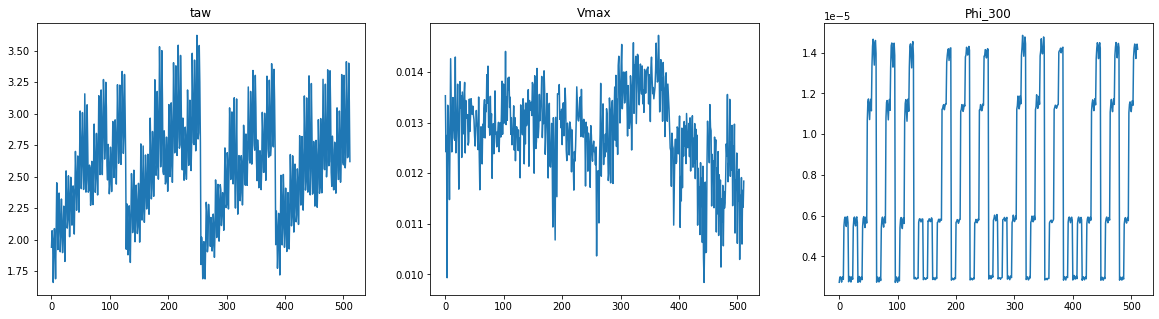

In [9]:
fig, ax = plt.subplots(1, 3, figsize =(20, 5))
ax[0].plot(df1.taw)
ax[0].title.set_text('taw')
ax[1].plot(df1.Vmax)
ax[1].title.set_text('Vmax')
ax[2].plot(df1.Phi_300)
ax[2].title.set_text('Phi_300')
plt.show()

We can observe the following from this three plots:


*   there is a strong correlation between '**Phi_300**' and '**taw**'
*   there is some sort of perodicity in the plot of 'taw' since we can assume   that  there is exist 4 types of clusters in the data and we can also observe the same thig from the "Phi_300"



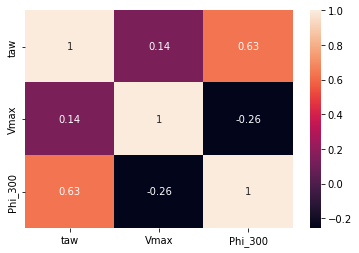

In [10]:
corr = df1.corr()
sns.heatmap(corr, annot = True)
plt.show()

A strong correlation coffiecent exist between the Phi_300 and Taw '0.63'

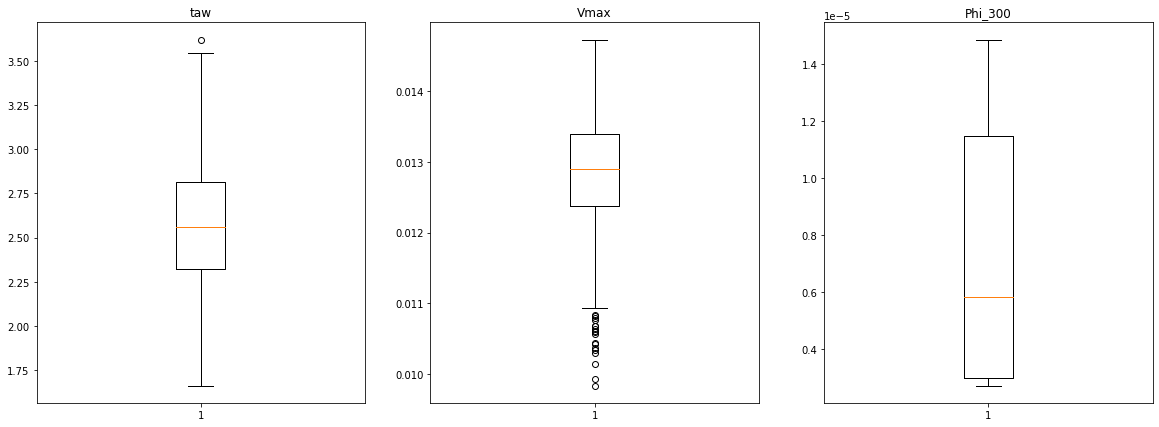

In [11]:
fig, ax = plt.subplots(1, 3, figsize =(20, 7))
ax[0].boxplot(df1['taw'])
ax[0].title.set_text('taw')
ax[1].boxplot(df1['Vmax'])
ax[1].title.set_text('Vmax')
ax[2].boxplot(df1['Phi_300'])
ax[2].title.set_text('Phi_300')
plt.show()

we can see from the paramter box plot that there is too many outliers for Vmax attributes, so we are going to count them as follow

In [12]:
def count_outliers(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

In [13]:
print(count_outliers(df1['taw']), count_outliers(df1['Vmax']),
      count_outliers(df1['Phi_300']))

1 18 0


## number of groups

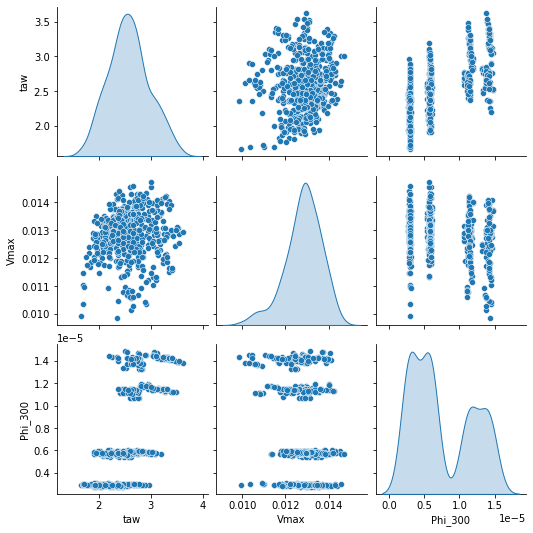

In [14]:
g = sns.pairplot(df1, diag_kind="kde")
#g.map_lower(sns.kdeplot, levels=4, color=".2") ####DELETE??
plt.show()

We can observe from the plots from (**taw**, **Phi_300**) and (**Vmax**, **Phi_300**) that we can see our data in **4 main groups**

# Task 2

### Categorical data
first let's try to compare between the categorical physical parameters and the observable parameters using A kernel density estimate (**KDE**) plot

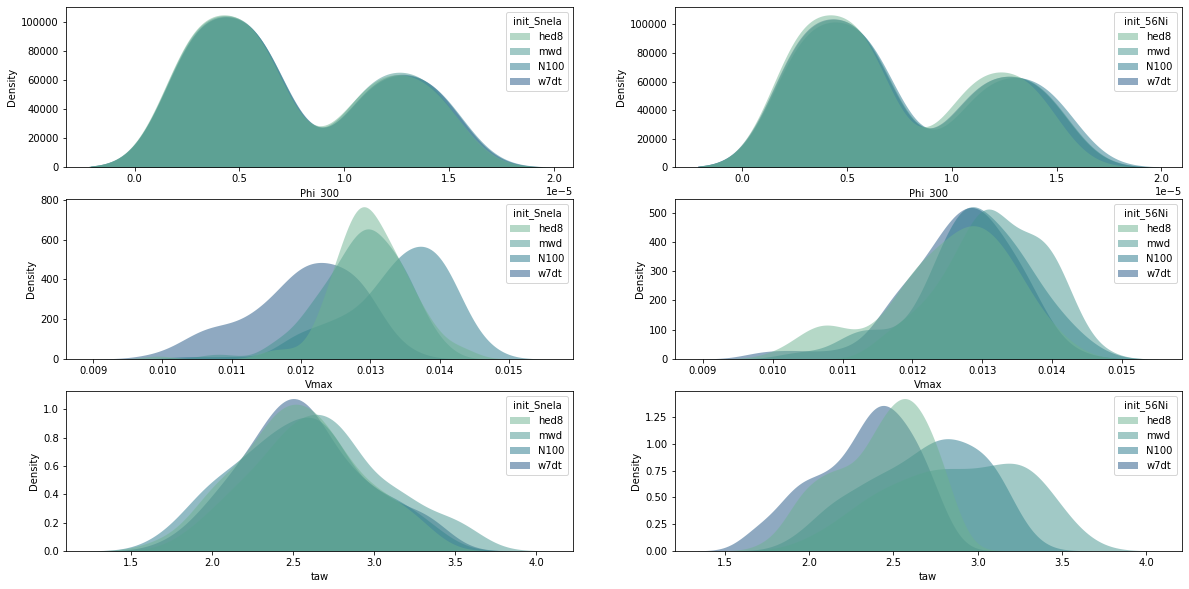

In [15]:
fig, ax = plt.subplots(ncols=2,nrows = 3, figsize =(20, 10))
ax[0][0] = sns.kdeplot(
   data=df, x="Phi_300", hue="init_Snela",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0, ax = ax[0][0]
)
ax[0][1] = sns.kdeplot(
   data=df, x="Phi_300", hue="init_56Ni",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0, ax=ax[0][1]
)
ax[1][0] = sns.kdeplot(
   data=df, x="Vmax", hue="init_Snela",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0, ax = ax[1][0]
)
ax[1][1] = sns.kdeplot(
   data=df, x="Vmax", hue="init_56Ni",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0, ax=ax[1][1]
)
ax[2][0] = sns.kdeplot(
   data=df, x="taw", hue="init_Snela",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0, ax = ax[2][0]
)
ax[2][1] = sns.kdeplot(
   data=df, x="taw", hue="init_56Ni",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0, ax=ax[2][1]
)
plt.show()

**What we can observe?**


*   We can see from the first row that the distribution of the "Phi_300" don't change with diffrient categories from "init_Snela" and "init_56Ni"


*   In the opposite we can see that "Vmax" not change too much with "init_56Ni" but the distribution change woth "init_Snela"

*   "taw" not chaneging with "init_Snela" but change with "init_56Ni"







### Numerical Correlations

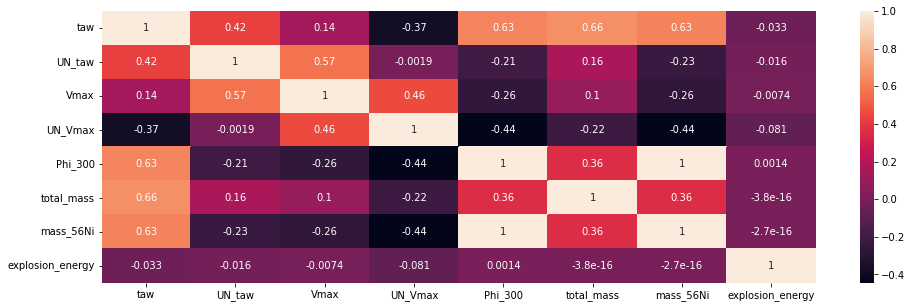

In [16]:
plt.figure(figsize = (16, 5))
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.show()

if we take a closer look then we can made the following observations :


*   "taw" and "mass_56Ni" have a strong positive correlation
*   "taw" and "total_mass" have a strong positive correlation
*   "Phi_300" and "mass_56Ni" have a strong positive correlation
*   also the "Phi_300" and "taw" mentioned in the previous section
*   "explosion energy" got **zero** correlation which suggest that there is no relationship between it and any other variable







### Joint plotting for highlly correlated data

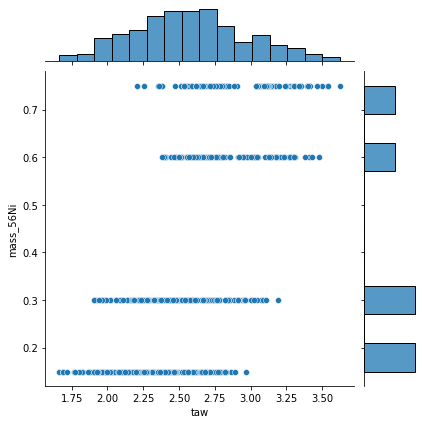

In [17]:
sns.jointplot(x='taw',y='mass_56Ni',data=df)
plt.show()

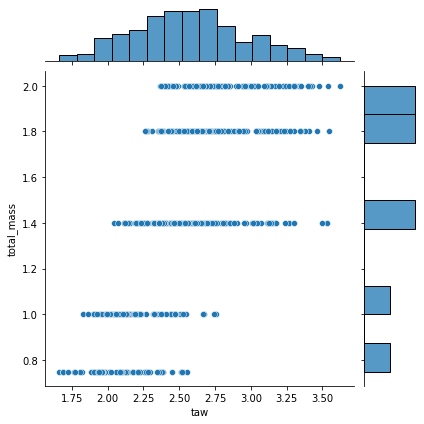

In [18]:
sns.jointplot(x='taw',y='total_mass',data=df)
plt.show()

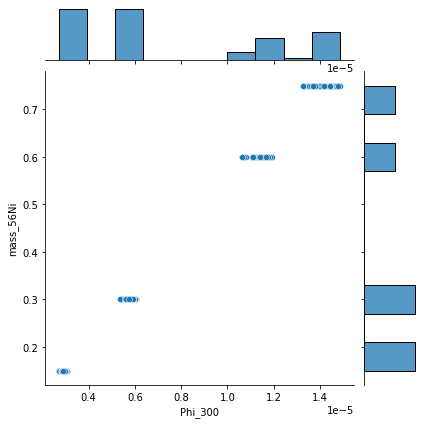

In [19]:
sns.jointplot(x='Phi_300',y='mass_56Ni',data=df)
plt.show()

In [20]:
print(df.init_56Ni.unique(), df.init_Snela.unique())

['hed8' 'mwd' 'N100' 'w7dt'] ['hed8' 'mwd' 'N100' 'w7dt']


In [21]:
df[['init_56Ni', 'init_Snela']].value_counts()

init_56Ni  init_Snela
N100       N100          32
           hed8          32
           mwd           32
           w7dt          32
hed8       N100          32
           hed8          32
           mwd           32
           w7dt          32
mwd        N100          32
           hed8          32
           mwd           32
           w7dt          32
w7dt       N100          32
           hed8          32
           mwd           32
           w7dt          32
dtype: int64

## Observations about the Groups

This three plots for the higly correlated data insure the assumption of existence of ***5 groups*** can be devided using "total_mass" as follow: 



1.   "total_mass" =  0.75
2.   "total_mass" = 1
3.   "total_mass" = 1.4
4.   "total_mass" = 1.8
5.   "total_mass" = 2

Or it can be devided into ***4 main groups*** using the "mass_56Ni":


1.   "mass_56Ni" = 0.3
2.   "mass_56Ni" = 0.6
3.   "mass_56Ni" = 0.15
4.   "mass_56Ni" = 0.75




> Ofcourse the second option is preferred since we have 4 types of "init_Snela" and 4 types of "init_56Ni" *('hed8' 'mwd' 'N100' 'w7dt')* and from their value counts we can see that each combination have **32 instance** and we also see in the previous section that the data also devided into 4 main groups using **Phi_300** 









# Task 3

In [22]:
X = df[['taw', 'Phi_300', 'Vmax']].copy()
y_totalmass = df['total_mass'].copy()
y_massNi = df['mass_56Ni'].copy()
y_explosionEnergy = df['explosion_energy'].copy()
y_initSnela = df['init_Snela'].copy()
y_initNi = df['init_56Ni'].copy()

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [36]:
from sklearn.model_selection import train_test_split
X_train_totalmass, X_test_totalmass, y_train_totalmass,  y_test_totalmass = train_test_split(
    X, y_totalmass, test_size = 0.3
)
X_train_massNi, X_test_massNi, y_train_massNi, y_test_massNi = train_test_split(
    X, y_massNi, test_size = 0.3
)
X_train_explosionEnergy, X_test_explosionEnergy,  y_train_explosionEnergy, y_test_explosionEnergy = train_test_split(
    X, y_explosionEnergy, test_size = 0.3
)
X_train_initSnela, X_test_initSnela, y_train_initSnela, y_test_initSnela = train_test_split(
    X, y_initSnela, test_size = 0.3
)
X_train_initNi, X_test_initNi, y_train_initNi, y_test_initNi = train_test_split(
    X, y_initNi, test_size = 0.3
)

In [51]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
forest1 = RandomForestRegressor()
forest2 = RandomForestRegressor()
forest3 = RandomForestRegressor()
forest4 = RandomForestClassifier()
forest5 = RandomForestClassifier()
forest1.fit(X_train_totalmass, y_train_totalmass)
forest2.fit(X_train_massNi, y_train_massNi)
forest3.fit(X_train_explosionEnergy, y_train_explosionEnergy)
forest4.fit(X_train_initSnela, y_train_initSnela)
forest5.fit(X_train_initNi, y_train_initNi)

RandomForestClassifier()

In [52]:
from sklearn.metrics import mean_squared_error, accuracy_score
print(mean_squared_error(forest1.predict(X_test_totalmass), y_test_totalmass))
print(mean_squared_error(forest2.predict(X_test_massNi), y_test_massNi))
print(mean_squared_error(forest3.predict(X_test_explosionEnergy), y_test_explosionEnergy))
print(accuracy_score(forest4.predict(X_test_initSnela), y_test_initSnela))
print(accuracy_score(forest5.predict(X_test_initNi), y_test_initNi))

0.07589575974025985
3.484682595480905e-31
0.5363930600649351
0.6818181818181818
0.7532467532467533


In [53]:
def routine(X, models):
  return [model.predict(X) for model in models]

In [54]:
models = [forest1, forest2, forest3, forest4, forest5]
testcase1 = np.array([3.35, 0.015, 1.2e-5])
testcase2 = np.array([2.54, 0.013, 5.02e-6])
testcase3 = np.array([2.46, 0.013, 1.03e-5])

In [55]:
print(routine(testcase1.reshape(1, -1), models), routine(testcase2.reshape(1, -1), models),
      routine(testcase3.reshape(1, -1), models), sep='\n')

[array([1.876]), array([0.3]), array([1.2875]), array(['mwd'], dtype=object), array(['mwd'], dtype=object)]
[array([1.876]), array([0.3]), array([1.3125]), array(['mwd'], dtype=object), array(['mwd'], dtype=object)]
[array([1.872]), array([0.3]), array([1.3125]), array(['mwd'], dtype=object), array(['mwd'], dtype=object)]


I choose to implement a random forest classifier and regressor since it consider to be a great ensemble technique it manged to achieve a high results:



*   0.07 MSE over total_Mass prediction
*   0 MSE over MassNi
*   0.5 MSE over explosionEnergy
*   68 accuracy init_Snela
*   75 accuracy inti_Ni
